In [6]:
import numpy as np
import matplotlib.pyplot as plt

# <div align="center"> Tableaux sur Python </div>

# Table des matières : 
1. Les types en C++
 1. Les entiers
 2. Les flottants
 3. Les complexes
2. Les tableaux Numpy
 1. Définitions & Propriétés
 2. Organisation en mémoire des tableaux
 3. Déclaration & Initialisation
 4. Sélection 
3. Manipulation algébrique des tableaux 
 1. Opérations binaires
  * élément par élément : +, -, *, /
 2. Opérations matricielles
  * Produit matriciel
  * Opérations vectorisées
  * Inversion de matrices
 3. Regressions polynomiales
 4. Traitement du signal : transformée de Fourier
3. Méthodes utiles sur scipy
 1. Régression non-linéaire
 2. Résolution d'équations non-linéaires

L'objet de ce TD-cours est l'étude de quelques outils intégrés dans python qui sont très employés dans le traitement des données ou la modélisation en physico-chimie : numpy (tableau et vectorisation), scipy (résolution d'équations, régression) et matplotlib (représentation graphique).

Le langage Python n'a pas été conçu à l'origine pour le calcul scientifique. Cependant, il aligne nombre de qualités utiles dans le traitement de données : simplicité de la syntaxe, modulabilité et interprétation. Dévélopée en 2006, conjointement à Scipy, la bibliothèque Numpy permet la manipulation de tableaux à multiples dimensions ainsi que la réalisation d'opérations vectorisées : transposition, sommation, ...

# Les types en C++

Numpy consiste en une surcouche de Python. Par conséquent, il dispose de son propre système de type importé du C/C++. Lorsque vous travaillerez avec numpy, il est fortement recommander d'utiliser les types associés à Numpy plutôt que les types natifs de Python.

Nous allons commencer par une description des différents types et chercher à comprendre leur représentation.

## Les entiers

Notre système de numérotation est basé sur un système décimal qui présente nombre d'avantage en calcul formel. Cependant, les machines ne savent calculer qu'en base 2. 

Un nombre entier positif en base $b$ est un p-tuplet de 0 et de 1, appelés **bits** :

$$\left( u_{p-1}, u_{p-2}, \ldots, u_0\right)_b$$

Un ensemble de 8 bits s'appelle un **octet**.

En base 10, un nombre est représenté par : 

$$n_{10} = \sum_{i=0}^{p-1} u_i b^i $$

ex : dans une représentation à 8 bits,

$$ 
\begin{align*}
(00011001)_2 &= 2^4 + 2^3 + 2^0 = 25_{10} \\
(00101010)_2 &= 2^5 + 2^3 + 2^1 = 42_{10}
\end{align*}
$$

Les nombres entiers positifs sont représentés directement par son écriture en base 2. Les nombres entiers négatifs sont représentés en **complément à 2**, qui consiste à prendre l'équivalent du nombre positif moins l'unité, puis à inverser tous les bits.


$$ 
\begin{align*}
-25_{10} & = \overline{25_{10} - 1_{10}} = \overline{24_{10}} \\
&= \overline{(00011000)_{2}} = (11100111)_2 \\
-42_{10} &= \overline{42_{10} - 1_{10}} = \overline{41_{10}} \\
&= \overline{(00010101)_2} =  (11101010)_2 \\
\end{align*}
$$

Rq : le bit le plus à gauche indique le signe de l'entier. On l'appelle le **bit de poids fort**.

Par conséquent, sur $N$ bits, les nombres représentables sont les suivants : 

$$ -2^{N - 1} \leq i \leq 2^{N-1} - 1$$

Le tableau suivant résume un peu les différents types d'entier, leur nom et les limites de leur représentation : 

| Nombre de bits | Nombre d'octets | nom | Limites |
| :------------: | :-------------: | :-: | :-----: |
| 8 | 1 | caractère | (-128, 127) |
| 16 | 2 | entier court | (-32768,  32767) |
| 32 | 4 | entier long | (-2147483648, 2147483647) |
| 64 | 8 | entier double long | (-9223372036854775808, 9223372036854775807) |

**Application**

Ecrivez les représentations sur 8 bits de : 2, 47, 100 et -46.

## Les flottants

Un nombre réel ou flottant est caractérisé par :
1. son signe (s);
2. son exposant ou caractéristique (e);
3. sa mantisse (m).

En fonctions du nombre (s+e+m) bits sur lequel la réel est encodé, il existe quelques encodages communs : 

| Nombre de bits | Nombre d'octets | nom | Méthode numpy associée |
| :------------: | :-------------: | :-: | :--------------------: | 
| 16 | 2 | demi-précision | np.float16 |
| 32 | 4 | simple précision | np.float32 |
| 64 | 8 | double précision | np.float64 |
| 128 | 16 | quadruple précision | np.float128 |

Ce type de réel est représenté par un motif binaire de la forme : 

$$\underbrace{s}_\text{signe sur 1 bit}\underbrace{eeeeeeee}_\text{exposant sur n_e bits}\underbrace{m----------m}_\text{mantisse sur n_m bits}$$

Comme pour les entiers, il existe différents types de représentation en fonction du nombre de bit permettant de présenter un réel : 

| Nombre de bits | (1,_ne,_nm) | Limites en absolu | Precision (CS) |
| :------------: | :---------: | :---------------: | :------------: |
| 16 | (1, 5, 10) | (3.1E-05, 504) | ~ 3 |
| 32 | (1, 8, 23) | (1.2E-38, 3.4E+38) | ~ 6 |
| 64 | (1, 11, 52) | (2.2E-308, 1.8E+308) | ~ 15 |
| 128 | (1, 15, 112) | (, 1.2E+4932) | ~ 71 |

Les représentations pour les différentes précisions, en fonction de (s, e, m), peuvent être données par les relations suivantes :
$$
\begin{align*}
r_{hp} &= s1.m × 2^{e−15}  \\
r_{sp} &= s1.m × 2^{e−127}  \\
r_{dp} & = s1.m × 2^{e−1023} \\
r_{qp} & = s1.m × 2^{e−16383}
\end{align*}
$$

**Application :**
Après avoir représenté 1.1 en flottant 16, montrer que sa représentation en flottant 32 et 64 est différente.

In [16]:
f16 = np.float16(1.1)
f32 = np.float32(f16)
f64 = np.float64(f16)

print(f16, f32, f64)

1.1 1.0996094 1.099609375


Afin de faire le lien entre les flottants en base 10 et leur représentation en base 2 sur 32 bits, on va chercher à représenter 10.4 : 

1. On commence par représenter la partie entière et décimale de 10.4 en base 2 :  

$$10.4 = \frac{104}{10} = \frac{52}{5} = \frac{(110100)_2}{(101)_2}$$

2. On réalise la division binaire de ce nombre : 

$$\frac{(110100)_2}{(101)_2} = (1010,0110011001100110011\ldots)_2 $$

3. On met en valeur l'exposant et la mantisse : 

$$
\begin{align*}
(1010,0110011001100110011\ldots)_2 &= (1,0100110011001100110011\ldots 2^3)_2 \\
&= (1,0100110011001100110011\ldots 2^{130-127})_2
\end{align*}
$$

4. On encode 130 dans 8 bits et on recopie la mantisse sur 23 bits : 

$$
\begin{align*}
130_{10} &= (10000010)_2\\
\end{align*}
$$

d'où $$(10.4)_{10} = (0|10000010|01001100110011001100110)_2$$

**Application :** Vous chercherez à représenter 20.2 en base 2 sur 32 bits.

In [ ]:
#Bonne chance

## Les complexes

Les complexes sont représentés sous la forme d'une paire paire de réels associé à la partie réelle et à la partie imaginaire.

| Nombre de bits | Nombre d'octets | nom | Méthode numpy associée |
| :------------: | :-------------: | :-: | :--------------------: | 
| 32 | 4 | paire de demi-précision | np.complex32 |
| 64 | 8 | paire de simple précision | np.complex64 |
| 128 | 16 | paire de double précision | np.complex128 |

# Les tableaux Numpy

Les tableaux numpy [*numpy array*] constituent un type particulier dans python. Il faut bien les distinguer des types natifs de python : list, tuple ou dict. 

%expliquer les différences principales

### Définitions & propriétés

Ces tableaux sont des **matrices denses**, par opposition aux **matrices creuses** [*sparses matrix*], caractérisées par : 
* un **rang** [*rank*] d’un tableau est son nombre de dimensions;
* une (ou des) **étendue(s)** [*extent*], qui correspond(ent) au nombre(s) d'élément(s) dans dans cette dimension;
* un **profil** [*shape*], qui est un vecteur dont chaque élément est l’étendue du tableau dans la dimension correspondante;
* une **taille** [*size*], qui est le produit des éléments du vecteur correspondant à son profil;
* un **type**, qui est le type des valeurs dans le tableau.

Deux tableaux sont dits **conformants** s’ils ont le même profil. 

L'utilisation de la magic command "?" sur np.ndarray permet d'obtenir des informations sur les objets numpy. Nous allons commencer par représenter deux matrices conformantes (3,3) : 

$$
A = \begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
\end{pmatrix}; B = \begin{pmatrix} 1 & 4 & 7 \\
2 & 5 & 8 \\
3 & 6 & 9 \\ \end{pmatrix}
$$

et chercher à identifier leurs propriétés associées. Nous allons nous appuyer sur les propriétés associées aux objets numpy : .shape, .size, .ndim (le poids en RAM, en octet, est donné par .nbytes)

 **Q.** Déterminer le rang, l'étendue, le profil et la taille de A et B en vous appuyant sur les propriétés des objets numpy


In [23]:
# Consulter les informations principales sur Numpy
## > np.ndarray?

dtype = np.float32

#Déclaration tableau
A = np.array([[1,2,3], [4, 5, 6], [7, 8, 9]], dtype = dtype)
B = np.array([[1,4,7], [2, 5, 8], [3, 6, 9]], dtype = dtype)

# profil
print("Profil : ",  A.shape)

#étendue
print("A a pour étendue 3 dans la dimension 0 et de 3 dans la dimension 1")

#rang
print("Rang : ", A.ndim)

#taille
print("Taille : ", A.size)

#Poids en RAM en octet
print("Espace disque : ", A.nbytes,  "octets")

Profil :  (3, 3)
A a pour étendue 3 dans la dimension 0 et de 3 dans la dimension 1
Rang :  2
Taille :  9
Espace disque :  36 octets


### Organisation en mémoire

Il est important de bien distinguer la représentation interpretée de A et B avec leur représentation en mémoire. L'instance associée à A est stockée sous la forme de 
* de données, représentées sous la forme d'une suite de cases mémoires, dont chacune représente les termes des matrices;
* de métadonnées, contenant une ou plusieurs étiquettes (ici une seule A) et les propriétés de l'array (ici le format (3,3)).
L'emplacement mémoire contigue porte un numéro d'identification qu'il est possible de visualiser en utilisant la propriété .data .

Une manière simple d'avoir l'organisation d'une matrice est d'utiliser la méthode .ravel, évaluée au format 'C' (c.-à-d. que les données sont organisées comme dans les langages C/C++ par opposition à F pour fortran).

Q. En vous appuyant sur A et B et en utilisant la fonction .ravel, montrer quel est l'axe le plus rapide. En déclarant que C = A, montrer que C et A ont le même emplacement mémoire. Quelles sont les conséquences immédiates pour vous utilisateur de python ?

In [24]:
#Ravel au format C
##A.ravel?

#Test
print(A.ravel('C'))
print(B.ravel('C'))

print("En python, les matrices sont lues suivant les lignes puis suivant les colonnes.")

C = A
D = A.copy()

print(A.data, C.data, D.data)

C[2,2] = 1000
D[2,2] = 2000

print(' A', A, '\n C', C, '\n D', D)

[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[1. 4. 7. 2. 5. 8. 3. 6. 9.]
En python, les matrices sont lues suivant les lignes puis suivant les colonnes.
<memory at 0x7ff789c40ee0> <memory at 0x7ff75d6972b0> <memory at 0x7ff75d697380>
 A [[   1.    2.    3.]
 [   4.    5.    6.]
 [   7.    8. 1000.]] 
 C [[   1.    2.    3.]
 [   4.    5.    6.]
 [   7.    8. 1000.]] 
 D [[1.e+00 2.e+00 3.e+00]
 [4.e+00 5.e+00 6.e+00]
 [7.e+00 8.e+00 2.e+03]]


### Déclaration & Initialisation

Pour déclarer et initier un tableau, il y a plusieurs manières de procéder : 
 1. élément par élément avec la fonction np.array;
 2. un array vide avec la fonction np.empty;
 3. un array plein composé exclusivement de 0 (np.zeros) ou exclusivement de 1 (np.ones);
 4. une suite arithmétique de valeur initiale, finale et de raison définie par l'utilisateur (np.arange) dont les dimensions peuvent être ajustées (np.reshape).
 
Initer un tableau nécessitent la déclaration des propriétés vues ci-dessus.
    
%Rappel : Pour voir les arguments de la fonction, on utilise "?".
    
 **Q.** Déclarer une matrice C, D, E et F de dimensions (3, 3), en entier 64, d'une des 4 manières précédente

In [62]:
shape = (3,3)
dtype = np.int64

E = np.array([[1,1,1],[1,1,1], [1,1,1]], dtype = dtype)
F = np.empty(shape, dtype = dtype)
G = np.ones(shape, dtype = dtype)
H = np.reshape(np.arange(0, 9, 1, dtype = dtype), shape)

print(' C = ', C, '\n',
     'D = ', D, '\n',
     'E = ', E, '\n',
     'F = ', F)

 C =  [[1 1 1]
 [1 1 1]
 [1 1 1]] 
 D =  [[1 4 7]
 [2 5 8]
 [3 6 9]] 
 E =  [[1 1 1]
 [1 1 1]
 [1 1 1]] 
 F =  [[1 1 1]
 [1 1 1]
 [1 1 1]]


### Sélection

Dans une dimensions données de taille $N$, il est possible de sélectionner des sections régulières de tableaux, sous la forme d'un tableau, en faisant varier le ou les indices à l'aide d'un triplet de la forme 
$$ [limite_1] : [limite_2] [:pas]$$

avec $limite_1$ : indice de début, $limite_2$ : indice de fin, $pas$ : l'incrément de l'indice.

Dans le cas d'une matrice de dimension 2, le premier triplet permet la sélection selon une **ligne** tandis que le second permet la selection selon une **colonne**.

**Q** Créer une matrice X composée de $90$ éléments, formattée en entier 32, dont chaque ligne correspond à une dizaine : 
$$
X = \begin{pmatrix}
0 & 1 & \cdots & 9 \\
10 & 11 & \cdots & 19\\
\dots & \dots & \dots & \dots \\
90 & 91 & \cdots & 99\\
\end{pmatrix}
$$

Sélectionner uniquement les nombres composés dont les dizaines est un chiffre pair et les unités est un chiffre impaire. Représenter sous la forme d'un array de dimension 1 trié par ordre croissant.

In [25]:
X = np.arange(0, 90, 1, dtype = np.int32).reshape((9, 10))

print(X)

X_sort = X[0::2,1::2].ravel()

print(X_sort)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]]
[ 1  3  5  7  9 21 23 25 27 29 41 43 45 47 49 61 63 65 67 69 81 83 85 87
 89]


**Q.** En utilisant la magic command "%%timeit", lisez la matrice X selon l'ordre de priorité ligne-colonne puis colonne-ligne et montrez quel sens de lecture est le plus rapide. Expliquez cette différence.

In [28]:
%%timeit
for a in range(X.shape[0]) : 
    for b in range(X.shape[1]) : 
        X[a, b]

16.6 µs ± 655 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [29]:
%%timeit
for b in range(X.shape[1]) : 
    for a in range(X.shape[0]) : 
        X[a, b]

16.5 µs ± 833 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [30]:
#Réponse
print("La lecture selon les lignes puis les colonnes est le plus rapide.")

La lecture selon les lignes puis les colonnes est le plus rapide.


## Manipulation des tableaux 

### Opérations algébrique élément par élément : +, -, *, /

Les opérateurs algébriques binaires sont exactement les mêmes que pour des entiers et des flottants. 

| Symbole | Expression | Interprétation |
| ------- | ---------- | -------------- |
| + | A + B | A s'additionne à B dans un nouvel emplacement mémoire |
| - | A - B | A se soustrait à B dans un nouvel emplacement mémoire |
| * | A * B | A se multiplie à B dans un nouvel emplacement mémoire |
| / | A / B | A se divise à B dans un nouvel emplacement mémoire |
| // | A // B | A se divise à B et donne la partie entière dans un nouvel emplacement mémoire |
| % | A % B | A se divise à B et donne le reste de la division euclidienne dans un nouvel emplacement mémoire |

Les opérandes A et B peuvent être : 
* des valeurs numériques;
* des tableaux numpy **conformants**;
* des expressions arithmétiques.

Lors de la réaction de l'opération $A \star B$, plusieurs cas de figure peuvent se présenter : 
* les 2 opérandes $A$ et $B$ sont du même type, l'expression arithmétique résultante sera aussi de ce type,
* les 2 opérandes $A$ et $B$ sont d'un type différent, le type de l'expression arithmétique résultante sera exprimée de la manière suivante : 

$$
np.bool < np.int8 < np.int16 < np.int32 < np.float16 < np.float32 < np.float64 < np.float128 < np.complex128 < np.complex256
$$

La fonction np.resulte_type(type1, type2) permet de connaître de l'opération arithmétique binaire entre type1 et type2. 

**Q.** Définissez une matrice G, formattée en flottant 32, de dimension (3, 3) composés de 1.0. Définissez une matrice diagonale H à partir de G composés de 2 (vous pourrez le faire naïvement en utilisant une boucle mais aussi en utilisant la fonction np.diag pour extraire la diagonale de G et fill_diagonal pour remplir la diagonale de H).


In [31]:
shape = (3,3)
type = np.float32

#Naive way
G = np.ones((3,3), dtype = dtype)
H = np.zeros((3,3), dtype = dtype)

for n in range(3) : 
    H[n,n] = 2 * G[n,n] 

print(' G', G ,'\n H',  H)

#Efficient way    
G = np.ones((3,3), dtype = dtype)
H = np.zeros((3,3), dtype = dtype)

np.fill_diagonal(H, 2 * np.diag(G))

print(' G', G ,'\n H',  H)


 G [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 
 H [[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 2.]]
 G [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 
 H [[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 2.]]


In [32]:
print(G + H, G - H, G * H, G / H) 

[[3. 1. 1.]
 [1. 3. 1.]
 [1. 1. 3.]] [[-1.  1.  1.]
 [ 1. -1.  1.]
 [ 1.  1. -1.]] [[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 2.]] [[0.5 inf inf]
 [inf 0.5 inf]
 [inf inf 0.5]]


<ipython-input-32-75047313140d>:1: RuntimeWarning: divide by zero encountered in true_divide
  print(G + H, G - H, G * H, G / H)


### Opérations relationnels élément par élément : >, <, ==

Les opérateurs relationnels permet de comparer élément par élément les termes entre deux tableaux. Ces opérateurs sont utiles pour construire des masques (matrices booléennes permettant de selectionner uniquement certains élèments). L'opération $A \star B$ se traduit par : 

<div align="center"> Entre deux éléments de A et B d'indice, si A  est plus $\star$ que B, alors l'opération résulte en un booleen True au même indice. Sinon, le booleen est False. </div>

La matrice booleenne résultante est sauvée dans un nouvel emplacement mémoire.

| Symbole | Expression | Interprétation |
| ------- | ---------- | -------------- |
| >= | A >= B | A est strictement plus grand que B |
| > | A > B | A est plus grand ou égal que B |
| <= | A <= B | A est strictement plus petit que B |
| < | A < B | A est plus petit ou égal que B |
| == | A == B | A est égal à B |
| != | A != B | A n'est pas égal à B |

**Q.** Après avoir construit les matrices suivantes au format flottant 16 : 

$$Y = \begin{pmatrix} 1.0 & 1.1 \\ 2.0 & 3.0 \end{pmatrix} ; Z = \begin{pmatrix} 1.0 & 1.2 \\ 2.0 & 3.0 \end{pmatrix} $$ 

Testez les différentes opérations relationnelles.

In [44]:
dtype = np.float16

Y = np.array([[1.0, 1.1], [2.0, 3.0]], dtype = dtype)
Z = np.array([[1.0, 1.2], [2.0, 3.0]], dtype = dtype)

print("Y > Z : \n", Y > Z)
print("Y >= Z : \n", Y >= Z)
print("Y < Z : \n", Y < Z)
print("Y <= Z : \n", Y <= Z)
print("Y = Z : \n", Y == Z)
print("Y != Z : \n", Y != Z)

Y > Z : 
 [[False False]
 [False False]]
Y >= Z : 
 [[ True False]
 [ True  True]]
Y < Z : 
 [[False  True]
 [False False]]
Y <= Z : 
 [[ True  True]
 [ True  True]]
Y = Z : 
 [[ True False]
 [ True  True]]
Y != Z : 
 [[False  True]
 [False False]]


### Opérations logiques élément par élément : and, or et not

Les opérateurs logiques permettent de comparer deux tableaux bouleens (c-à-d composé de np.True_/np.False_) **conformants** élément par élément.

| Fonction | Symbole | Expression | Interprétation |
| -------- | ------- | ---------- | -------------- |
| np.logical_and | & |expr1 & expr2 | expr1 et expr2 |
| np.logical_or | \| |expr1 \| expr2 | expr1 ou expr2 |
| np.logical_not | ~ |expr1 ~ expr2 | expr1 n'est pas expr2 |

En application numérique, on est souvent amené à créer des booleens en combinant opérateurs relationnels et logiques :

$$bA = (A > 1) ~ \& ~ (A < 2)$$

signifiant que l'on cherche tous les élément de A qui sont à la fois plus strictement supérieur à 1 et strictement inférieur à 2.

Les règles logiques sont données ci-dessous : 

| A | B | A & B | A \| B | A ~ B |
| - | - | ----- | ------ | ----- |
| True | True | True | True | False |
| False | True | False | True | False |
| True | False | False | True | True | 
| False | False | False | False | False |

Remarque : 
1. la fonction np.invert est particulièrement utile puisqu'elle permet d'obtenir la négation de A et de B ;
2. les emplacements mémoires de sauvegarde des fonctions np.logical sont définies par les keys arguments "where" et "out". Par défaut, (out = None, where = True) font que les valeurs du booleen A sont réevaluées avec les valeurs de sortie des fonctions logical. 

**Q.** Vous testerez ces différentes possibilités sur deux tableaux A et B de valeurs : 

\begin{align*}
A & = ( True, False, True, False ) \\
B & = ( True, True, False, False )
\end{align*}

In [ ]:
# A terminer

## Opérations matricielles

### Produit matriciel

Le produit matriciel est une opération courante en calcul formel (*p. ex.* dans les systèmes de spin). Si on considère une opération entre A de dimension (N, M) et B de dimension (M, L), on obtient chaque coeffient de la matrice produit C, de format (N, L), par : 
$$
\begin{align*}
c_{n, l} = \sum_{m=1}^M  a_{n,m} \cdot b_{m, l}
\end{align*}
$$

La méthode à utiliser pour réaliser cette opération est np.dot. Vous pouvez tout de fois employé l'opérateur associé : @

**Application :**
Réaliser l'opération entre A et B : 
$$
A =\begin{pmatrix} 1 & 0 & 0 \\ 1 & 1 & 0 \\ 1 & 1 & 1 \end{pmatrix} ; B =\begin{pmatrix} 1 & 1 & 1 \\ 0 & 1 & 1 \\ 0 & 0 & 1 \end{pmatrix}
$$

In [53]:
dtype = np.float32

A = np.array([[1,0,0], [1,1,0], [1,1,1]], dtype = dtype)
B = np.array([[1,1,1], [0,1,1], [0,0,1]], dtype = dtype)

C = A @ B

print(C)

[[1. 1. 1.]
 [1. 2. 2.]
 [1. 2. 3.]]


### Opérations "optimisées"

L'objectif principal du calcul matriciel est de s'affranchir des boucles en python qui sont en général extrêmement longues. Certaines opérations peuvent être réalisées sur une ou plusieurs dimensions d'une matrice. 

ex : 
1. Sommation : np.sum
2. Moyenne : np.mean
3. Ecart-type : np.std

**Application**
Après avoir construit une matrice N de taille (1000, 1000) composé de 1, vous comparerez à l'aide de la magic command %%timeit le temps de calcul entre une fonction somme que vous aurez construite et la fonction somme de numpy.

In [55]:
%%timeit
N = np.ones((1000,1000), dtype = np.float32)
np.sum(N)

445 µs ± 3.44 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [57]:
def sum(N) : 
    n = 0
    for k in range(N.shape[0]) : 
        for l in range(N.shape[1]) : 
            n += N[k,l]
    return n

In [70]:
%%timeit
N = np.ones((1000, 1000), dtype = np.float32)
sum(N)

290 ms ± 9.93 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Inversion d'un système d'équations linéaires

On est souvent confrontés à des problèmes linéaires qui peuvent être résolus à l'aide d'outils matriciels : 

* Détermination des valeurs propres d'une matrice : np.linalg.eigvals (matrice queconque), np.linalg.eigvalsh, np.linalg.eig (matrice carrée quelconque), np.linalg.eigh (matrice hermitienne ou symmétrique réelle carrée)
* Inversion d'une matrice : np.linalg.inv
* Résolution de systèmes d'équations linéaires de la forme $A \cdot X = B$ : np.linalg.solve

**Application :**

Soit les matrices A, B définies comme : 
$$
A = \begin{pmatrix} 2 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 0 & 2 \end{pmatrix} ; \quad B = \begin{pmatrix} 2 & 0 & 0 \\ 1 & 2 & 0 \\ 1 & 1 & 2 \end{pmatrix} 
$$

Déterminez-en les valeurs propres et inversez-les.

In [69]:
A = np.array([[2, 0, 0], [0, 2, 0], [0, 0, 2]])
B = np.array([[2, 0, 0], [1, 2, 0], [1, 1, 2]])
iA = np.linalg.inv(A)
iB = np.linalg.inv(B)

print('A', A, '\n', iA, '\n', A @ iA)
print('B', B, '\n', iB, '\n', B @ iB)

A [[2 0 0]
 [0 2 0]
 [0 0 2]] 
 [[0.5 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  0.5]] 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
B [[2 0 0]
 [1 2 0]
 [1 1 2]] 
 [[ 0.5    0.     0.   ]
 [-0.25   0.5    0.   ]
 [-0.125 -0.25   0.5  ]] 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


**Exercice avancé : Résolution d'un système quantique discret**

Une première approche des orbitales moléculaires consiste en la théorie de Hückel, laquelle permet de comprendre qualitativement les systèmes $\pi$ des orbitales d'un polyène linéaire. Celui-ci pose les hypothèses suivantes  :

* Approximation de Born-Oppenheimer
* Approximation orbitalaire
* Combinaison linéaire d'orbitales atomiques
* Il pose un certains nombre d'hypothèses concernant la forme des intégrales pour un polyène linéaire : 

$$
\begin{align*}
\langle i | \hat{H} | j \rangle &= \begin{cases} \alpha & \text{si }i=j \\
\beta & \text{si } |i - j| = 1 \\
0 & \text{sinon} \\
\end{cases} \\
\langle i | j \rangle &= \delta_{ij}
\end{align*}
$$
avec $\delta$ le symbôle de Kronecker.

Pour un polyène, composé de N pair carbones, lesquels sont numérotés de [0, $\ldots$, N-1], on obtient le système composé des N équations suivantes : 
$$
\begin{align*}
\alpha c_0 + \beta c_1 &= E c_0 \\
\forall i \in [1, N-2], \quad \beta c_{i-1} + \alpha c_i + \beta c_{i+1} &= E c_i \\
\alpha c_{N-1} + \beta c_{N-2} &= E c_{N-1}
\end{align*}
$$

A partir de ce système, vous construirez un algorithme permettant de déterminer la valeur des coefficients $c_i$ associé aux orbitales $p_i$ en posant $\alpha = 0$ et $\beta = 1$.

In [95]:
dtype = np.float32
N = 2

if N % 2 == 0 : 
    pass
else : 
    raise ValueError("Nombre de carbonne doit être pair")

def H(N, dtype) : 
    h = np.zeros((N,N), dtype = dtype)
    
    for n in range(N) : 
        h[n,n] = 0
        if n != 0 and n != N-1 : 
            h[n,n+1] = 1
            h[n,n-1] = 1
        elif n == 0  :
            h[n,n+1] = 1
        elif n == N-1 : 
            h[n,n-1] = 1
    return h

#Construction de l'hamiltonien
out = H(N, dtype)

#Recherche des valeurs et vecteurs propres
evalues, evector = np.linalg.eig(out)

#Normalisation
evector /= np.sqrt(np.sum(evector**2))

print("Hamiltonien de Hückel : \n", out)
print("Valeurs propres de Hückel : \n", evalues)
print("Vecteurs propres de Hückel : \n", evector)

Hamiltonien de Hückel : 
 [[0. 1.]
 [1. 0.]]
Valeurs propres de Hückel : 
 [ 1. -1.]
Vecteurs propres de Hückel : 
 [[ 0.5 -0.5]
 [ 0.5  0.5]]


**Exercice avancé : Résolution d'équations différentielles linéaires**

On cherche à résoudre un problème simple d'électrostatique en utilisant une *méthode des différences finies* : le condensateur dans le vide avec une charge pontuelle et sans charge ponctuelle au milieu. Cette méthode consiste à définir une grille discrète, regulière et finie sur laquelle on va chercher à résoudre en chaque point la valeur du potentiel électrique.

L'opérateur contrôle la tension U et -U à chacune des bornes du condensateur et la valeur de la chaque q dans une boîte de dimension $[L_x, L_y]$. A partir de l'équation de Poisson, le problème se traduit mathématiquement comme : 

$$ \Delta V (x, y) = q \delta (x- \frac{L_x}{2}, y - \frac{L_y}{2}) $$

où $(L_x / 2, L_y / 2)$ est l'emplacement de la charge ponctuelle au milieu de la boîte.

avec pour conditions aux limites : 

$$
\begin{align*}
\forall y \in [0, L_y], V(0, y) &= -U \\
V(L_x, y) &= U \\
\forall x \in [0; L_x], \frac{\partial V}{\partial y} (x, 0) &= 0 \\
\frac{\partial V}{\partial y} (x, L_y) &= 0 \\
\end{align*}
$$

On discrétise l'espace tel que pour tout $n \in [0, N-1], m \in [0, M-1]$ avec $N$, $M$ deux entiers positifs, on a :

$$
\begin{align*}
x_n &= h \cdot n\\
y_m &= h \cdot m
\end{align*}
$$

Il en résulte que le problème physique s'écrit pour $V_{n, m} = V (x_n, y_m)$ :

$$
\begin{align*}
\forall (n,m) \in [1, N-2] x [1, M-2], \quad \Delta V_{n, m} &= \frac{V_{n+1, m} + V_{n , m+1} - 4 V_{n,m} + V_{n-1,m} + V_{n, m-1}}{h^2} = 0 \\
\forall m \in [1, M-1], V_{0, m} &= -U \\
, V_{N-1, m} &= U \\
\forall n \in [1, N-2], V_{n, 0} - V_{n, 1} &= 0 \\
, V_{n, M-1} - V_{n, M-2} &= 0 \\
\end{align*}
$$

Dans cette situation, il nous suffit de range ce système d'équation en choissant un axe rapide (x) et un axe lent (y) : 


$$
M \cdot \begin{pmatrix} V_{1, 0} \\ V_{2, 0} \\ ... \\ V_{N-1, 0} \\ V_{1, 1} \\ ... \\ V_{1, M-1} \\ V_{N-1, M-1} \end{pmatrix} = \begin{pmatrix} -1 \\ 0 \\ ... \\ -1 \\ 0 \end{pmatrix}
$$

In [76]:

dtype_i = np.int16
dtype_f = np.int32

#Capacitor parameters
h  = 0.1
Lx = 2.2
Ly = 2.2


#########################
# Create a grid
#########################
N = int(Lx // h)
M = int(Ly // h)

Lx = N * h
Ly = M * h

print("La boîte fait Nx, Ny = {} x {}.".format(N,M), flush = True)

n = np.arange(0, N, 1, dtype = dtype_i)
m = np.arange(0, M, 1, dtype = dtype_i)


def Coeff(N, M, U, dtype) :
    out = np.zeros((N*M, N*M), dtype = dtype)
    U = np.zeros((N*M,), dtype = dtype)
    
    nfill, mfill = tuple(map(lambda x : x.ravel(), np.meshgrid(n, m)))
    print(len(nfill), N*M)
    for k in range(len(nfill)) : 
        if 1 < nfill[k] < N-1 and 1 < mfill[k] < M-1 :
            out[nfill[k]*mfill[k], nfill[k]*mfill[k]] = -4
            
            out[(nfill[k]+1)*mfill[k], nfill[k]*mfill[k]] = 1
            out[nfill[k]*mfill[k], (nfill[k]+1)*mfill[k]] = 1
            out[(nfill[k]-1)*mfill[k], nfill[k]*mfill[k]] = 1
            out[nfill[k]*mfill[k], (nfill[k]-1)*mfill[k]] = 1
            
            out[nfill[k]*(mfill[k]+1), nfill[k]*mfill[k]] = 1
            out[nfill[k]*mfill[k], nfill[k]*(mfill[k]+1)] = 1
            out[nfill[k]*(mfill[k]-1), nfill[k]*mfill[k]] = 1
            out[nfill[k]*mfill[k], nfill[k]*(mfill[k]-1)] = 1
            
        if nfill[k] == 0 : 
            out[nfill[k]*mfill[k], nfill[k]*mfill[k]] = 1
            U[nfill[k]*mfill[k]] = 1
        elif nfill[k] == N-1 :
            out[nfill[k]*mfill[k], nfill[k]*mfill[k]] = 1
            U[nfill[k]*mfill[k]] = -1
        elif mfill[k] == 0 :
            out[nfill[k]*mfill[k], nfill[k]*(mfill[k]+1)] = 1
            out[nfill[k]*(mfill[k]+1), nfill[k]*mfill[k]] = 1
        elif mfill[k] == N-1 : 
            out[nfill[k]*mfill[k], nfill[k]*(mfill[k]-1)] = 1
            out[nfill[k]*(mfill[k]-1), nfill[k]*mfill[k]] = 1
    return out, U
            
a, b = Coeff(N, M, 0, dtype_f)

#np.linalg.solve(a, b)

La boîte fait Nx, Ny = 22 x 22.
484 484


## Régressions polynomiales

Bien que scipy soit le package présentant la majorité des fonctionnalités pour réaliser des régressions (cf ci-après), numpy permet de réaliser des régressions polynomiales à une dimension : 

Deux fonctions sont particulières utiles : 
* np.polyfit : permet la réalisation d'un fit sur un polynôme de votre choix, 
* np.poly1d : permet de créer une fonction polynomiale à partir d'un fit de votre choix.

Par exemple : 

Le polynome est de la forme c0 x^2 + c1 x + c2 
 c0 = 1.0000000000000009 +/- 5.691909621018664e-17
 c1 = -2.8294739609347793e-16 +/- 1.484050144839713e-16
 c2 = -7.070164473148484e-16 +/- 6.490599121775467e-16



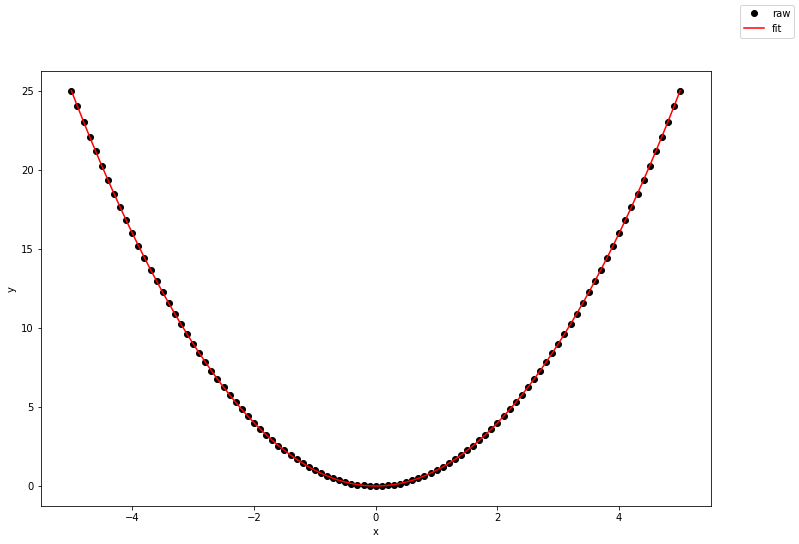

In [124]:
# Paramètres
xmin = -5
xmax = 5
Nx   = 101
e    = 0

# Création d'une fonction quadratique bruitée
x = np.linspace(xmin, xmax, Nx)
f = lambda x, e : x**2 + e * (np.random.random(len(x)) - 0.5)

raw = f(x, e)

#Regression
Ci, Cov = np.polyfit(x, raw, deg = 2, cov = 1)
dCi = np.sqrt(np.diag(Cov))
P = np.poly1d(Ci)


print("Le polynome est de la forme c0 x^2 + c1 x + c2 \n",
      "c0 = {0} +/- {1}\n".format(Ci[0], dCi[0]),
      "c1 = {0} +/- {1}\n".format(Ci[1], dCi[1]),
      "c2 = {0} +/- {1}\n".format(Ci[2], dCi[2]),
      flush = True)

fig = plt.figure(figsize = (12, 8))
ax = fig.subplots()
ax.plot(x, raw, color = 'black', marker = 'o', ls = 'none', label = 'raw')
ax.plot(x, P(x), color = 'red', label = 'fit')

ax.set_xlabel('x')
ax.set_ylabel('y')

fig.legend()


**Exercice :**

Lors d'un TP, des expérimentateurs cherchent à déterminer la stoechiométrie du complexe $\left[ Fe(III)SCN_n \right]^{(3-n) +}$ en réalisant l'équilibre : 

$$ Fe^{3+} (aq) + n ~ SCN^- (aq) = \left[ Fe(III)SCN_n \right]^{(3-n) +} $$

Seul complexe formé absorbe dans le visible.

Une solution, notée A, de chlorure de fer (III) est préparée à la concentration de 2 mmol/L en milieu acide. Une solution, notée B, de thiocyanate de potassium est préparée à la concentration de 2 mmol/L.

![title](img/A_fy.png)

Les solutions A et B sont mélangées en différents ratios volumiques comme suit et leurs absorbances mesurées à $\lambda_{max} = 457 nm$ : 

| Solution $n^\circ$ | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
| ------------------ | - | - | - | - | - | - | - | - | - | -- |
| $V_A$ $[mL]$ | 4.0 | 4.0 | 4.0 | 4.0 | 4.0 | 0.5 | 1.0 | 1.5 | 2.0 | 2.5 |
| $V_B$ $[mL]$ | 0.5 | 1.0 | 1.5 | 2.0 | 2.5 | 4.0 | 4.0 | 4.0 | 4.0 | 4.0 |
| $A$ $[\emptyset]$ | 0.277 | 0.453 | 0.553 | 0.624 | 0.673 | 0.281 | 0.460 | 0.568 | 0.627 | 0.672 |

Un développement sur lequel nous ne nous attarderons pas a montré que la stoechiométrie $n$ est donnée au maximum d'absorbance de la fonction A = f(y) avec y défini comme : 

$$ y = \frac{V_A}{V_{tot}} $$

En utilisant un modèle polynomial approprié, déterminer la stoechiométrie du complexe dans ces conditions opératoires.

Le maximum est donné à ymax = 0.5, soit une stoechiométrie de 1.0.


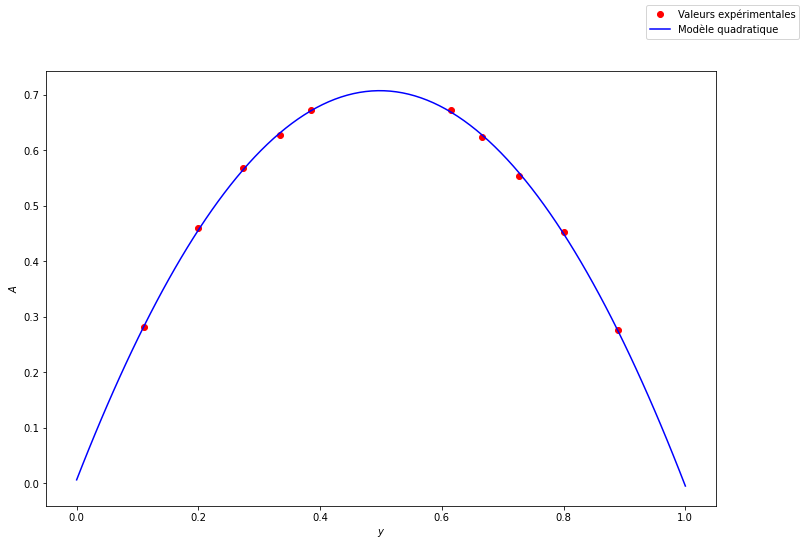

In [30]:
dtype = np.float32

A = np.array([0.277, 0.453, 0.553, 0.624, 0.673, 0.281, 0.460, 0.568, 0.627, 0.672], dtype =  dtype)
VA = np.array([4.0, 4.0, 4.0, 4.0, 4.0, 0.5, 1.0, 1.5, 2.0, 2.5], dtype = dtype)
VB = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 4.0, 4.0, 4.0, 4.0, 4.0], dtype = dtype)


yraw = VA / (VA + VB) 
y = np.linspace(0, 1, num = 100, dtype = dtype)

P = np.poly1d(np.polyfit(yraw, A, deg  = 2))

fig = plt.figure(figsize = (12, 8))
ax = fig.subplots()
ax.plot(yraw, A, 'ro', label = 'Valeurs expérimentales')
ax.plot(y, P(y), color = 'blue', label = 'Modèle quadratique')
ax.set_xlabel("$y$")
ax.set_ylabel("$A$")
fig.legend()

ymax = - P[1] / 2 / P[2]
n = (1 - ymax) / ymax
print("Le maximum est donné à ymax = {:.1f}, soit une stoechiométrie de {:.1f}.".format(ymax, n))

## Traitement du signal : la transformée de Fourier



**Exercice d'application**



La boîte fait Nx, Ny = 22 x 22.
484 484


LinAlgError: Singular matrix